# Benford's Analysis - Climate

This notebook was made to supplement one of my blogpost - [Benford's Law as a Fraud Detection technique](https://trigonaminima.github.io/data-analysis/fraud/2017/07/29/Benford's-Law-as-a-Fraud-Detection-technique/). Although, you'll be able to follow it along without reading the blogpost. You just need to know what Benford's law says. In this notebook, we'll see how to do a Benford's analysis and by doing so, we'll see if our dataset (historical temperatures of India) will follow the Benford's law.


## Index

1. [World Temperatures](#wt)
2. [Global Land Temperatures - India](#glt)
3. [GlobalLandTemperaturesByState - India](#glts)
4. [GlobalLandTemperaturesByMajorCity - India](#gltmc)
5. [GlobalLandTemperaturesByCity - India](#gltc)
6. [Conclusion](#conc)


## Dataset

I cant find the link for the dataset used. It was an open dataset I had downloaded some 7-8 months back. I had downloaded just for the India category. It consists of the temperatures from 1700s to present (with a lot of NaNs for earlier periods).




In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data_dir = "Data/Climate Change/"

files = [
    "WorldTemperaturesClean.csv",
    "GlobalLandTemperaturesByCity.csv",
    "GlobalLandTemperaturesByMajorCity.csv",
    "GlobalLandTemperaturesByState.csv",
    "GlobalLandTemperatures.csv"
    ]


<a id='wt'></a>
## 1. WorldTemperatures

In [74]:
wtc = pd.read_csv(data_dir + files[0], dtype=str)
wtc.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
0,1850-01-01,0.7490000000000001,8.241999999999999,-3.2060000000000004
1,1850-02-01,3.071,9.97,-2.2910000000000004
2,1850-03-01,4.954,10.347,-1.905
3,1850-04-01,7.217,12.934000000000001,1.018
4,1850-05-01,10.004,15.655,3.8110000000000004


In [75]:
print(wtc.shape)

(1992, 4)


#### Land Max Temperature


In [158]:
print("Column description-\n")
print(wtc.LandMaxTemperature.astype(float).describe())

Column description-

count    1992.000000
mean       14.350601
std         4.309579
min         5.900000
25%        10.212000
50%        14.760000
75%        18.451500
max        21.320000
Name: LandMaxTemperature, dtype: float64


First digit frequencies-

1    0.683233
2    0.075301
5    0.000502
6    0.003514
7    0.037651
8    0.118474
9    0.081325
Name: LandMaxTemperature, dtype: float64


[]

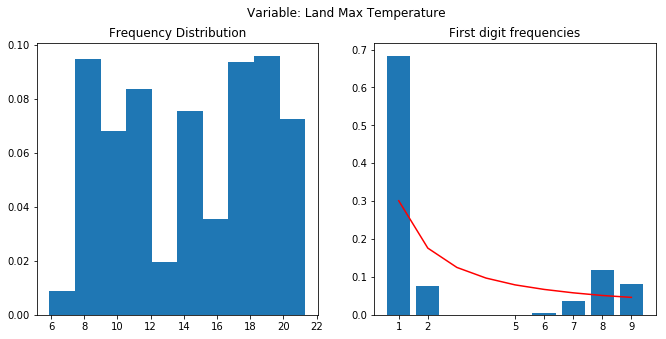

In [185]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

# Frequency distribution plot
ax = axs[0]
ax.hist(wtc.LandMaxTemperature.astype(float), normed=1)
ax.set_title("Frequency Distribution")

# First digit frequencies
freq = wtc.LandMaxTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq = freq/wtc.shape[0]
print("First digit frequencies-\n")
print(freq.sort_index())

# First frequency digit plot
ax = axs[1]
ax.bar(freq.index.astype(int), freq)
ax.plot(range(1, 10), [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], c='red')
ax.set_title("First digit frequencies")
plt.xticks(freq.index.astype(int))


# Main title
plt.suptitle("Variable: Land Max Temperature")
plt.plot()

In the above plots we can see that this column (LandMaxTemperature) was not good for benford analysis. The min and max of the vaiable ranges from 6 to 22. This is not suitable for benford's law. Not enough **variance** in the data. Then the distribution also does not follow the **uniform distribution** pattern. Data is just not enough.

2nd plot shows the Benford plot. It does not follow the Benford's law (red line). Digits 3 and 4 are not even present in the data.

#### Land Min Temperature

In [167]:
print("Column description-")
wtc.LandMinTemperature.astype(float).abs().describe()

Column description-


count    1992.000000
mean        4.174757
std         2.713801
min         0.011000
25%         1.889500
50%         3.521500
75%         6.778750
max         9.715000
Name: LandMinTemperature, dtype: float64

First digit frequencies-

1    0.157129
2    0.164659
3    0.143072
4    0.076807
5    0.094378
6    0.086345
7    0.135542
8    0.112952
9    0.029116
Name: LandMinTemperature, dtype: float64


[]

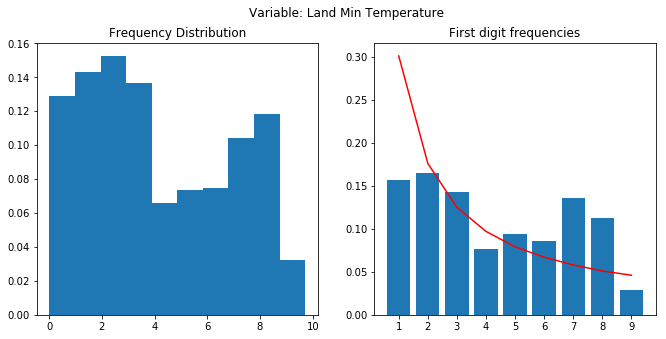

In [186]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

# Frequency distribution plot
ax = axs[0]
ax.hist(wtc.LandMinTemperature.astype(float).abs(), normed=1)
ax.set_title("Frequency Distribution")

# First digit frequencies
freq = wtc.LandMinTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq = freq/wtc.shape[0]
print("First digit frequencies-\n")
print(freq.sort_index())

# First frequency digit plot
ax = axs[1]
ax.bar(freq.index.astype(int), freq)
ax.plot(range(1, 10), [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], c='red')
ax.set_title("First digit frequencies")
plt.xticks(freq.index.astype(int))

# Main title
plt.suptitle("Variable: Land Min Temperature")
plt.plot()

Here we have all the digits in the first digit frequency plot. It does not follow the Benford's law properly though. If we look carefully, both frequency distribution and first digit frequency plots are almost same. And, that is because, our data ranges from 0 to 9 same as our fir digit plot except the 0. Again, not good enough **variance**, no **uniform distribution** and **small dataset**.

Clearly, this column (LandMinTemperature) was not a good candidate for Benford's law. Red line delineates that.

#### Land Average Temperature

In [166]:
print("Column description-")
wtc.LandAverageTemperature.astype(float).abs().describe()

Column description-


count    1992.000000
mean        8.571583
std         4.263193
min         0.404000
25%         4.430000
50%         8.850500
75%        12.858500
max        15.482000
Name: LandAverageTemperature, dtype: float64

First digit frequencies-

1    0.443775
2    0.094378
3    0.103916
4    0.072289
5    0.074799
6    0.046687
7    0.030622
8    0.067269
9    0.066265
Name: LandAverageTemperature, dtype: float64


[]

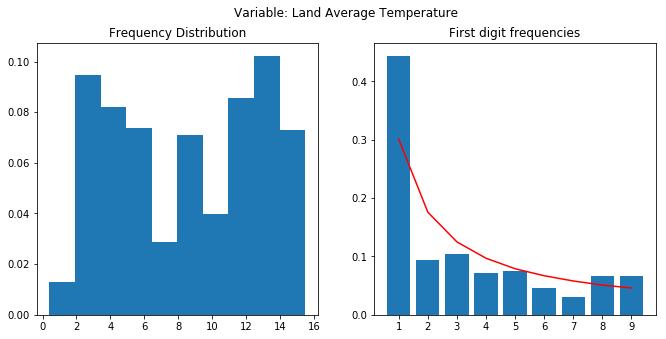

In [187]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

# Frequency distribution plot
ax = axs[0]
ax.hist(wtc.LandAverageTemperature.astype(float).abs(), normed=1)
ax.set_title("Frequency Distribution")

# First digit frequencies
freq = wtc.LandAverageTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq = freq/wtc.shape[0]
print("First digit frequencies-\n")
print(freq.sort_index())

# First frequency digit plot
ax = axs[1]
ax.bar(freq.index.astype(int), freq)
ax.plot(range(1, 10), [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], c='red')
ax.set_title("First digit frequencies")
plt.xticks(freq.index.astype(int))

# Main title
plt.suptitle("Variable: Land Average Temperature")
plt.plot()

We have all the digits to compare. No **uniform distribution** can be seen. Data ranges from 0 to 15. Not enough **variance** again. And, dataset is small as well.

The first digit frequency plot, *kind of* follows the trend but fails (red line). Frequencies of digit 1 and 2 varies *a lot*. Then digits 6 and 7 should be higher than 8 and 9.


<a id='glt'></a>
## 2. GlobalLandTemperatures - India

In [89]:
glt = pd.read_csv(data_dir + files[-1], dtype=str)
glt.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1796-01-01,17.044,2.044,India
1,1796-02-01,19.192999999999998,1.359,India
2,1796-03-01,22.319000000000006,2.125,India
3,1796-04-01,27.233,1.51,India
4,1796-05-01,30.035,1.338,India


In [90]:
print(glt.shape)

(2613, 4)


In [165]:
print("Column description-")
glt.AverageTemperature.astype(float).describe()

Column description-


count    2508.000000
mean       23.873789
std         4.325811
min        14.385000
25%        19.857750
50%        25.018500
75%        27.132750
max        31.329000
Name: AverageTemperature, dtype: float64

In [168]:
# wtc.LandAverageTemperature.astype(str).str[0].unique()
freq_avg = glt.AverageTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq_avg = freq_avg/glt.shape[0]
print(freq_avg.sort_index())


1    0.249522
2    0.671259
3    0.039036
Name: AverageTemperature, dtype: float64


Here, we dont even have all the digits to get a frequency of. Moving on.

<a id='glts'></a>
## 3. GlobalLandTemperaturesByState - India

In [14]:
glts = pd.read_csv(data_dir + files[-2], dtype=str)
glts.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1796-01-01,26.534,1.9040000000000001,Andaman And Nicobar,India
1,1796-02-01,26.294,1.122,Andaman And Nicobar,India
2,1796-03-01,26.18,1.959,Andaman And Nicobar,India
3,1796-04-01,27.942,1.281,Andaman And Nicobar,India
4,1796-05-01,28.651,1.119,Andaman And Nicobar,India


In [109]:
glts.shape

(86664, 5)

In [170]:
print("Column description-")
glts.AverageTemperature.astype(float).abs().describe()

Column description-


count    81620.000000
mean        22.729187
std          7.158426
min          0.004000
25%         19.063000
50%         25.094500
75%         27.628000
max         36.339000
Name: AverageTemperature, dtype: float64

First digit frequencies-

1    0.200222
2    0.596603
3    0.088849
4    0.009173
5    0.009727
6    0.010546
7    0.009439
8    0.007743
9    0.009496
Name: AverageTemperature, dtype: float64


[]

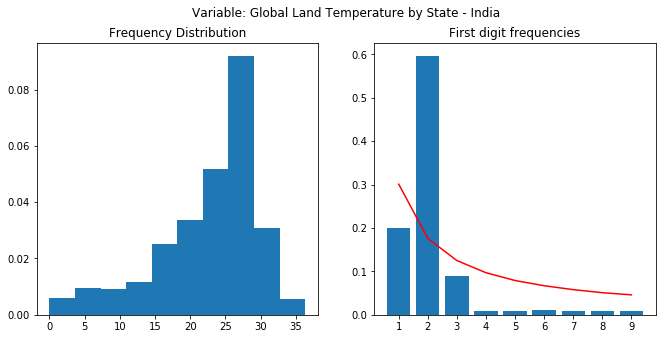

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

# Frequency distribution plot
ax = axs[0]
ax.hist(glts.AverageTemperature.astype(float).abs().dropna(), normed=1)
ax.set_title("Frequency Distribution")

# First digit frequencies
freq = glts.AverageTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq = freq/glts.shape[0]
print("First digit frequencies-\n")
print(freq.sort_index())

# First frequency digit plot
ax = axs[1]
ax.bar(freq.index.astype(int), freq)
ax.plot(range(1, 10), [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], c='red')
ax.set_title("First digit frequencies")
plt.xticks(freq.index.astype(int))

# Main title
plt.suptitle("Variable: Global Land Temperature by State - India")
plt.plot()

Here, the situation is a bit different. Dataset is fairly large. We have a left skewed frequency distribution. If it had been a **right skewed or uniform**, it'd have been helpful. Data also has a **small variance** thus limiting the magnitude.

Benford law isn't followed properly here as well. Red line again.

<a id='gltmc'></a>
## 4. GlobalLandTemperaturesByMajorCity - India

In [111]:
gltmc = pd.read_csv(data_dir + files[-3], dtype=str)
gltmc.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
1,1796-02-01,21.632,1.77,Ahmadabad,India,23.31N,72.52E
2,1796-03-01,24.953000000000007,2.427,Ahmadabad,India,23.31N,72.52E
3,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
4,1796-05-01,33.223000000000006,1.496,Ahmadabad,India,23.31N,72.52E


In [112]:
gltmc.shape

(36582, 7)

In [178]:
print("Column description-")
gltmc.AverageTemperature.astype(float).abs().describe()

Column description-


count    34627.000000
mean        25.809309
std          4.851196
min         11.378000
25%         22.935000
50%         26.518000
75%         29.254000
max         36.477000
Name: AverageTemperature, dtype: float64

In [177]:
# wtc.LandAverageTemperature.astype(str).str[0].unique()
freq_avg = gltmc.AverageTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq_avg = freq_avg/gltmc.shape[0]
print(freq_avg.sort_index())

1    0.129381
2    0.636105
3    0.181073
Name: AverageTemperature, dtype: float64


Here again we have only 3 variables. No sense running the analysis.

<a id='gltc'></a>
## 5. GlobalLandTemperaturesByCity - India

In [12]:
gltc = pd.read_csv(data_dir + files[1], dtype=str)
gltc.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
1,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
2,1816-05-01,32.535000000000004,2.408,Abohar,India,29.74N,73.85E
3,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
4,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [117]:
gltc.shape

(1014906, 7)

In [179]:
print("Column description-")
gltc.AverageTemperature.astype(float).abs().describe()

Column description-


count    960548.000000
mean         25.430123
std           5.125845
min           0.002000
25%          22.484000
50%          26.314000
75%          29.037000
max          37.522000
Name: AverageTemperature, dtype: float64

First digit frequencies-

1    0.149957
2    0.630902
3    0.162176
4    0.000602
5    0.000661
6    0.000466
7    0.000350
8    0.000398
9    0.000929
Name: AverageTemperature, dtype: float64


[]

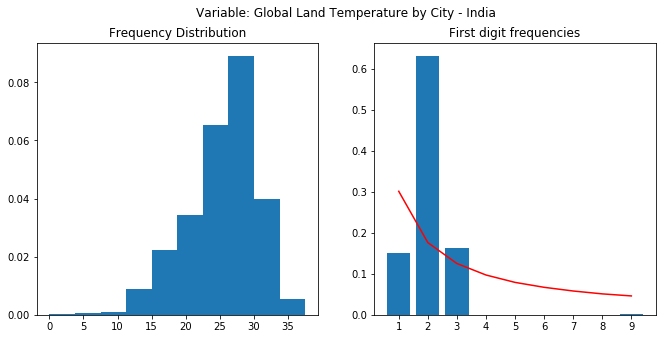

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

# Frequency distribution plot
ax = axs[0]
ax.hist(gltc.AverageTemperature.astype(float).abs().dropna(), normed=1)
ax.set_title("Frequency Distribution")

# First digit frequencies
freq = gltc.AverageTemperature.str.replace("-", "").str.lstrip("0").str.lstrip(".").str.lstrip("0").str[0].value_counts()
freq = freq/gltc.shape[0]
print("First digit frequencies-\n")
print(freq.sort_index())

# First frequency digit plot
ax = axs[1]
ax.bar(freq.index.astype(int), freq)
ax.plot(range(1, 10), [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046], c='red')
ax.set_title("First digit frequencies")
plt.xticks(freq.index.astype(int))

# Main title
plt.suptitle("Variable: Global Land Temperature by City - India")
plt.plot()

This is same as [GlobalLandTemperaturesByState - India](#gltc). Left skewed distribution and small variance. Benford's law doesn't hold here as well.

<a id='conc'></a>
## Conclusion

So, turns out, this dataset didn't follow the Benford's law. Some of the obvious reasons are:

- **Not enough variability in the data**: For Benford's law to be accurate, dataset has to cover large order of magnitudes. Here, most of the data was contained within a very small range. Due to the geography being India, temperature wont be ranging much.


- **Pre-defined mins and maxs**: With our temperature measuring scale, the Earth's temperature can only be contained within a small range of values - -100 <sup>o</sup>C to 100 <sup>o</sup>C, will be the most generous range. Wikipedia tells me the lowest temp ever on earth has been -89 <sup>o</sup>C and highest being 54 <sup>o</sup>C. On top of this, I had my data confined to just India which itself will have a narrower range of temperatures.


- **Uniform distributions**: Dataset has to be uniformly distributed or right skewed, along with large order of magnitudes. Here, none of the collections showed such a distribution.


The source of this and other notebooks can be found in this Github repo - [Notebooks](https://github.com/TrigonaMinima/Notebooks).

